# **DETECTION MODEL**

### **LIBRARIES**

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

### **LOAD DATASET**

In [3]:
df = pd.read_csv('../Datasets/vehicle_fault_data_v9.csv')
df.head(10)

,Vehicle_ID,Brand,Model,Vehicle_Age_Years,Odometer_Reading_km,Ambient_Temperature_C,Engine_Temp_C,Engine_RPM,Oil_Pressure_psi,Coolant_Level_pct,...,Mass_Airflow_Rate_gs,Throttle_Position_pct,Brake_Pad_Wear_pct,Tire_Pressure_psi,Vibration_Level_mm_s,Fuel_Consumption_L_100km,Fault_Status,Faulty_Unit,Fault_Type,Fault_Severity
0,DL6CRD8920,Maruti Suzuki,Baleno,5,56710,17.4,99.0,962.551923,53.2,80.7,...,11.8,25.5,63.4,31.7,2.5,6.3,1,Fuel System,Fuel Injector Clog,4
1,DL11CNW3393,Hyundai,Venue,8,92632,39.0,102.4,811.000000,47.1,91.7,...,11.4,39.2,60.4,25.1,1.6,11.8,1,Tires,Low Tire Pressure,3
2,DL7CMO3062,Hyundai,i10,2,20788,12.7,113.4,1905.000000,52.2,75.2,...,14.0,28.0,61.9,32.3,2.4,10.1,1,Cooling System,Overheating,8
3,DL3CNC8991,Hyundai,Venue,2,20788,34.5,103.4,1413.592618,42.9,70.1,...,4.4,56.2,69.3,32.7,1.4,9.4,1,Fuel System,Fuel Injector Clog,4
4,DL6CVB8229,Tata,Nexon,10,116580,15.8,97.4,2122.000000,18.4,79.8,...,3.8,15.5,91.6,32.1,0.6,9.1,1,Engine,Low Oil Pressure,10
5,DL1CBR1503,Maruti Suzuki,Baleno,8,92632,33.5,105.9,1104.000000,20.9,84.1,...,13.9,16.0,37.3,33.2,2.9,8.2,1,Engine,Low Oil Pressure,10
6,DL4CQB1335,Mahindra,Thar,4,44736,27.3,105.1,1430.000000,26.4,72.7,...,8.3,27.0,85.4,34.9,2.3,9.9,1,Engine,Low Oil Pressure,10
7,DL4CQD2408,Hyundai,Venue,12,140528,37.1,105.0,2044.000000,29.2,86.8,...,13.0,50.5,93.9,28.2,2.8,6.2,1,Tires,Low Tire Pressure,1
8,DL1CXD8205,Mahindra,Thar,1,8814,10.0,93.1,1243.000000,18.4,90.8,...,3.2,52.6,76.2,31.8,2.4,6.3,1,Engine,Low Oil Pressure,10
9,DL6CJZ4613,Maruti Suzuki,Wagon R,1,8814,28.8,102.0,1077.000000,44.7,77.1,...,13.8,31.0,74.0,32.6,1.3,6.9,0,No Fault,No Fault,0


### **EXPLORATION**

In [4]:
df.shape

(20300, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20300 entries, 0 to 20299
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Vehicle_ID                20300 non-null  object 
 1   Brand                     20300 non-null  object 
 2   Model                     20300 non-null  object 
 3   Vehicle_Age_Years         20300 non-null  int64  
 4   Odometer_Reading_km       20300 non-null  int64  
 5   Ambient_Temperature_C     20300 non-null  float64
 6   Engine_Temp_C             20300 non-null  float64
 7   Engine_RPM                20300 non-null  float64
 8   Oil_Pressure_psi          20300 non-null  float64
 9   Coolant_Level_pct         19285 non-null  float64
 10  Battery_Voltage_V         20300 non-null  float64
 11  Mass_Airflow_Rate_gs      19285 non-null  float64
 12  Throttle_Position_pct     20300 non-null  float64
 13  Brake_Pad_Wear_pct        20300 non-null  float64
 14  Tire_P

In [6]:
df.describe()

,Vehicle_Age_Years,Odometer_Reading_km,Ambient_Temperature_C,Engine_Temp_C,Engine_RPM,Oil_Pressure_psi,Coolant_Level_pct,Battery_Voltage_V,Mass_Airflow_Rate_gs,Throttle_Position_pct,Brake_Pad_Wear_pct,Tire_Pressure_psi,Vibration_Level_mm_s,Fuel_Consumption_L_100km,Fault_Status,Fault_Severity
count,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,19285.000000,20300.000000,19285.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000
mean,7.474631,86447.899803,27.529197,97.758951,1638.966448,46.917448,85.046803,13.377729,9.516987,37.593473,62.727458,32.662936,2.238931,8.513744,0.350542,2.133350
std,4.029462,48317.235809,10.099165,6.298397,574.143850,12.434324,8.649048,0.675706,4.128201,13.035787,22.415190,1.986194,1.016026,2.015680,0.477151,3.301298
min,1.000000,8814.000000,10.000000,88.000000,540.306531,18.000000,70.000000,11.500000,3.000000,15.000000,5.000000,22.000000,0.500000,5.000000,0.000000,0.000000
25%,4.000000,44736.000000,18.800000,92.700000,1158.000000,36.675000,77.600000,12.900000,6.200000,26.200000,44.800000,31.900000,1.400000,6.800000,0.000000,0.000000
50%,7.000000,80658.000000,27.500000,97.400000,1621.000000,47.100000,85.100000,13.400000,9.300000,37.700000,63.400000,32.900000,2.200000,8.500000,0.000000,0.000000
75%,11.000000,128554.000000,36.200000,102.100000,2086.000000,57.600000,92.600000,13.900000,12.400000,49.000000,81.800000,34.000000,3.100000,10.200000,1.000000,4.000000
max,14.000000,241497.000000,45.000000,122.000000,3978.000000,68.000000,100.000000,14.500000,25.000000,60.000000,100.000000,35.000000,4.000000,12.000000,1.000000,10.000000


In [7]:
df.isnull().sum()

Vehicle_ID                     0
Brand                          0
Model                          0
Vehicle_Age_Years              0
Odometer_Reading_km            0
Ambient_Temperature_C          0
Engine_Temp_C                  0
Engine_RPM                     0
Oil_Pressure_psi               0
Coolant_Level_pct           1015
Battery_Voltage_V              0
Mass_Airflow_Rate_gs        1015
Throttle_Position_pct          0
Brake_Pad_Wear_pct             0
Tire_Pressure_psi              0
Vibration_Level_mm_s           0
Fuel_Consumption_L_100km       0
Fault_Status                   0
Faulty_Unit                    0
Fault_Type                     0
Fault_Severity                 0
dtype: int64

### **DATA EXPLORATION & PREPROCESSING**

In [8]:
df.drop_duplicates(inplace=True, keep='first')

df['Brand'] = df['Brand'].str.title()

initial_rows = len(df)

df = df[~((df['Vehicle_Age_Years'] <= 1) & (df['Odometer_Reading_km'] > 100000))]

for col in ['Coolant_Level_pct', 'Mass_Airflow_Rate_gs']:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    if col not in ['Fault_Status', 'Fault_Severity']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)

C:\Users\satya\AppData\Local\Temp\ipykernel_8280\3087962320.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\satya\AppData\Local\Temp\ipykernel_8280\3087962320.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

C:\Users\satya\AppData\Local\Temp\ipykernel_8280\3412363660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fault_Status', data=df, palette='muted')


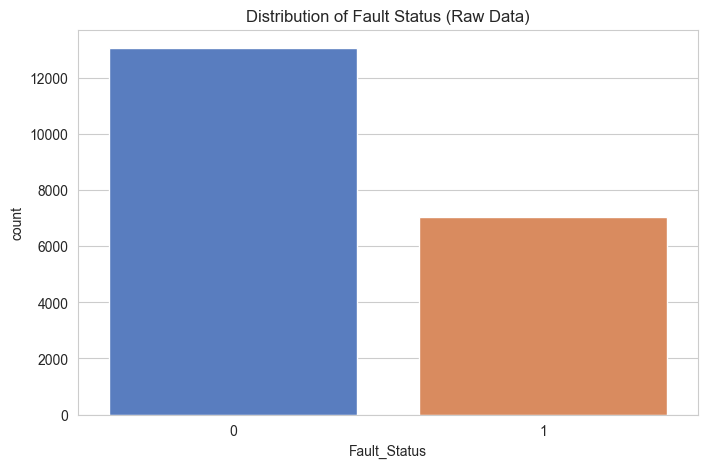

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.countplot(x='Fault_Status', data=df, palette='muted')
plt.title('Distribution of Fault Status (Raw Data)')
plt.show()

### **FEATURE ENGINEERING**

In [10]:
X = df.drop(columns=['Vehicle_ID', 'Fault_Status', 'Faulty_Unit', 'Fault_Type', 'Fault_Severity'])
y = df['Fault_Status']

In [11]:
X['km_per_year'] = X['Odometer_Reading_km'] / (X['Vehicle_Age_Years'] + 1)
X['temp_difference'] = X['Engine_Temp_C'] - X['Ambient_Temperature_C']

X = pd.get_dummies(X, columns=['Brand', 'Model'], drop_first=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
scaler_cols = [col for col in ['Odometer_Reading_km', 'Ambient_Temperature_C', 'Engine_Temp_C', 'Engine_RPM', 'Oil_Pressure_psi', 'Coolant_Level_pct', 'Battery_Voltage_V', 'Mass_Airflow_Rate_gs', 'Throttle_Position_pct', 'Brake_Pad_Wear_pct', 'Tire_Pressure_psi', 'Vibration_Level_mm_s', 'Fuel_Consumption_L_100km', 'km_per_year', 'temp_difference'] if col in X.columns]
scaler = StandardScaler()
X_train[scaler_cols] = scaler.fit_transform(X_train[scaler_cols])
X_test[scaler_cols] = scaler.transform(X_test[scaler_cols])

### **MODEL SELECTION**

In [15]:
from sklearn.model_selection import cross_val_score

param_dist = {
    'n_estimators': [100, 200, 300, 500], 'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rfc = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(
    estimator=rfc, param_distributions=param_dist,
    n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=1, scoring='f1'
)

rs.fit(X_train, y_train)
print("✅ Tuning complete.")
best_model = rs.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   7.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   7.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   7.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  18.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  17.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  19.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimato

### **EVALUATION METRICS**

In [16]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Not Faulty', 'Faulty']))

              precision    recall  f1-score   support

  Not Faulty       0.91      1.00      0.96      3919
      Faulty       1.00      0.83      0.90      2109

    accuracy                           0.94      6028
   macro avg       0.96      0.91      0.93      6028
weighted avg       0.94      0.94      0.94      6028



In [17]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv('../Datasets/train_processed.csv', index=False)
test_df.to_csv('../Datasets/test_processed.csv', index=False)

In [18]:
X.to_csv('../Datasets/features_encoded.csv', index=False)
y.to_csv('../Datasets/target.csv', index=False)

### **DATA VISUALIZATION**

C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1179348712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Fault_Type', data=faulty_data_raw, order=faulty_data_raw['Fault_Type'].value_counts().index, palette='viridis')


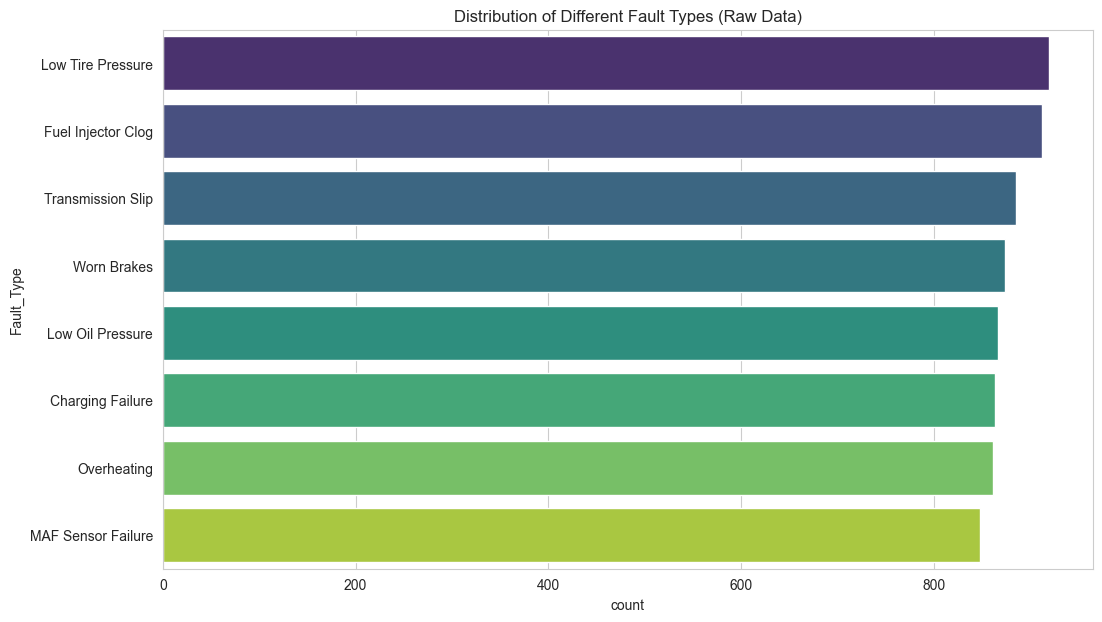

In [19]:
plt.figure(figsize=(12, 7))
faulty_data_raw = df[df['Fault_Status'] == 1]
sns.countplot(y='Fault_Type', data=faulty_data_raw, order=faulty_data_raw['Fault_Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Different Fault Types (Raw Data)')
plt.show()

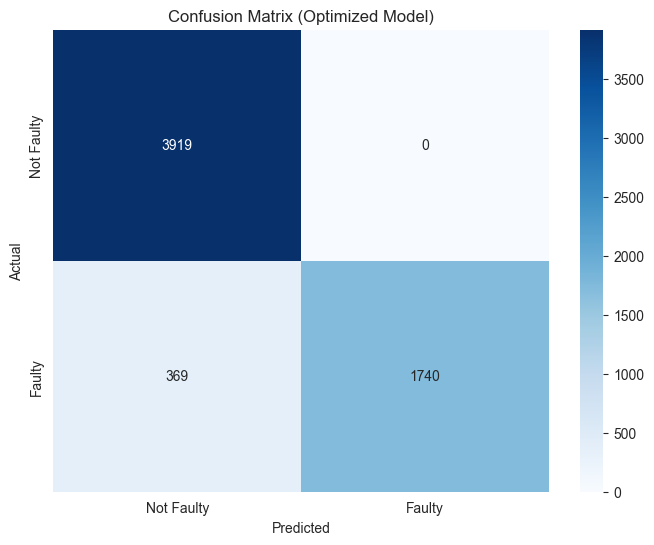

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Faulty', 'Faulty'], yticklabels=['Not Faulty', 'Faulty'])
plt.title('Confusion Matrix (Optimized Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

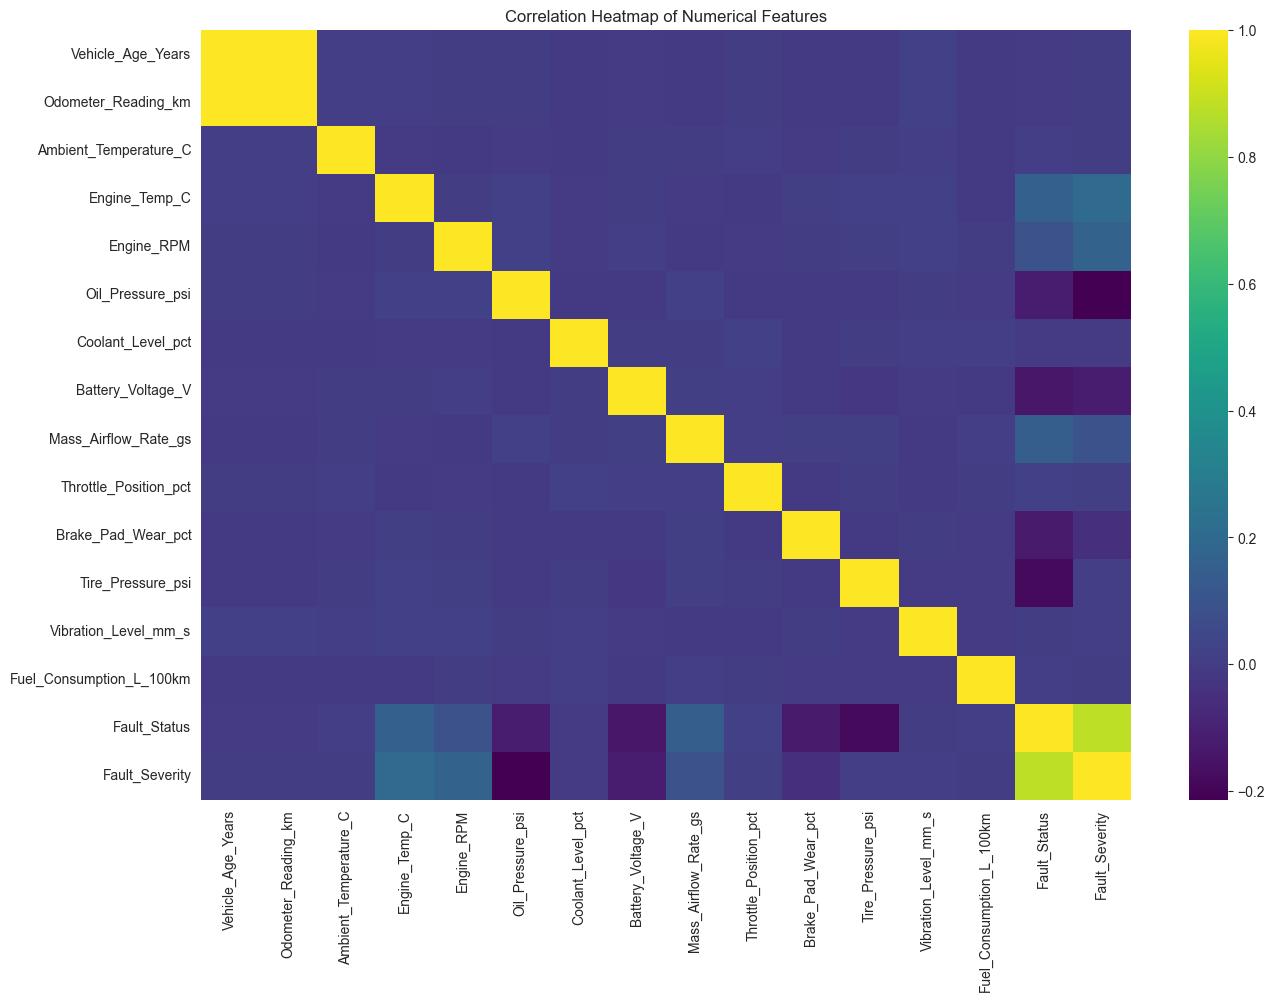

In [21]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 0][feature], label='Not Faulty', shade=True)
C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 1][feature], label='Faulty', shade=True)


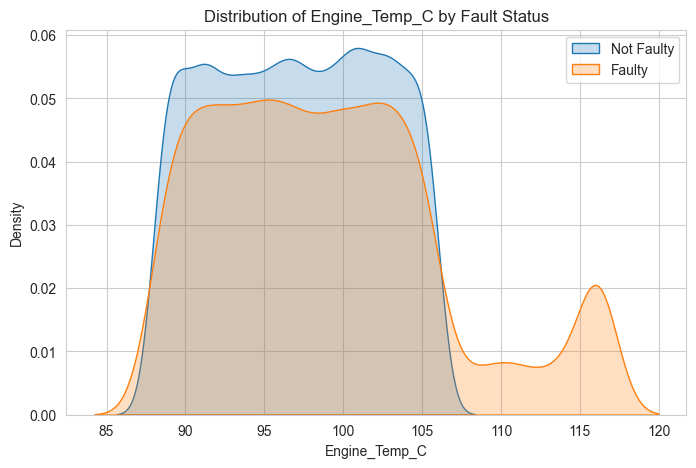

C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 0][feature], label='Not Faulty', shade=True)
C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 1][feature], label='Faulty', shade=True)


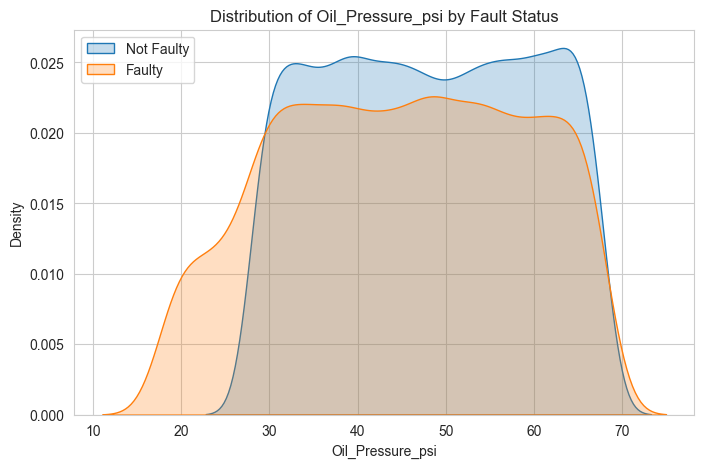

C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 0][feature], label='Not Faulty', shade=True)
C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 1][feature], label='Faulty', shade=True)


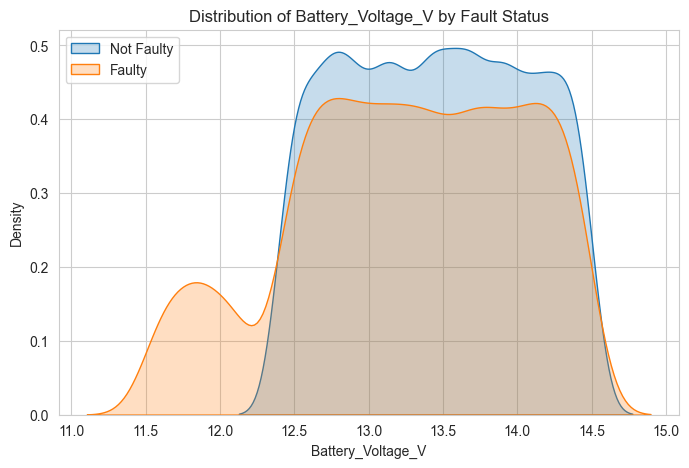

C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 0][feature], label='Not Faulty', shade=True)
C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 1][feature], label='Faulty', shade=True)


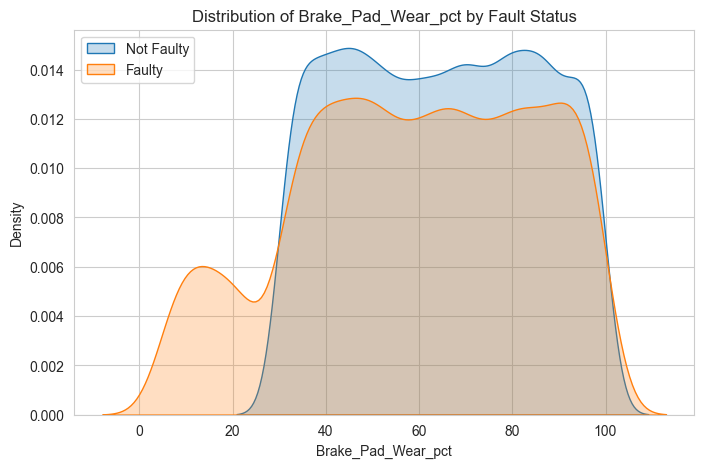

C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 0][feature], label='Not Faulty', shade=True)
C:\Users\satya\AppData\Local\Temp\ipykernel_8280\1069983574.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fault_Status'] == 1][feature], label='Faulty', shade=True)


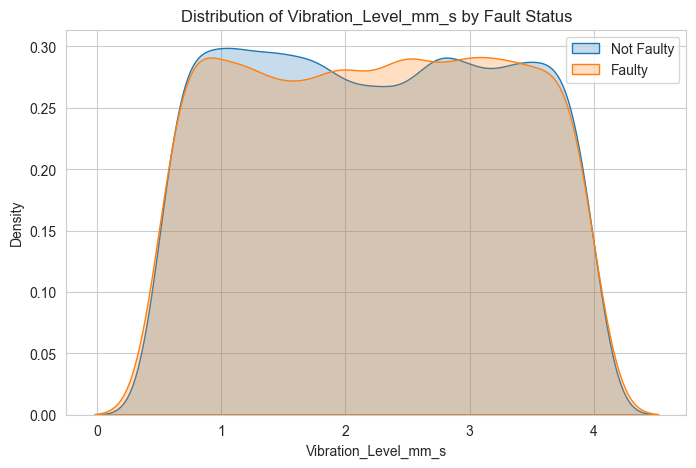

In [22]:
features_to_plot = ['Engine_Temp_C', 'Oil_Pressure_psi', 'Battery_Voltage_V', 'Brake_Pad_Wear_pct', 'Vibration_Level_mm_s']
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[df['Fault_Status'] == 0][feature], label='Not Faulty', shade=True)
    sns.kdeplot(df[df['Fault_Status'] == 1][feature], label='Faulty', shade=True)
    plt.title(f'Distribution of {feature} by Fault Status')
    plt.legend()
    plt.show()

C:\Users\satya\AppData\Local\Temp\ipykernel_8280\344171395.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.head(20), y=feature_importance.head(20).index, palette='coolwarm')


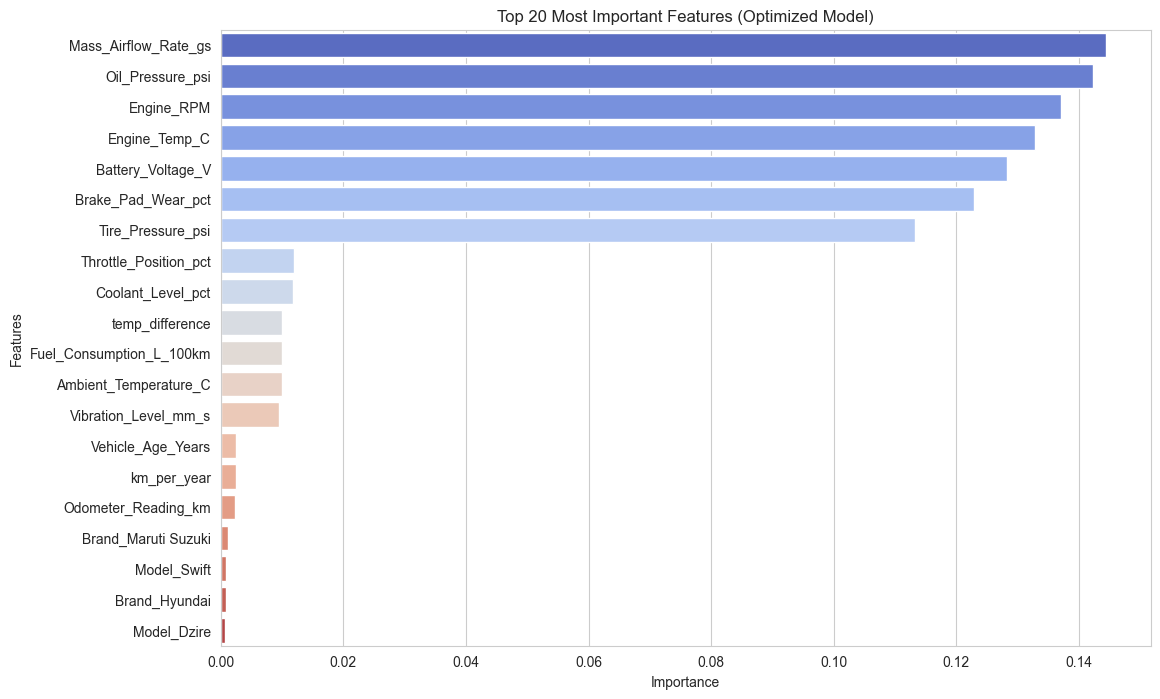

In [23]:
importances = best_model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.head(20), y=feature_importance.head(20).index, palette='coolwarm')
plt.title('Top 20 Most Important Features (Optimized Model)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [24]:
loaded_model = joblib.dump(best_model, '../Models/Vehicle_Fault_Detection_Model.pkl')
print("Model saved to 'Vehicle_Fault_Detection_Model.pkl'")

Model saved to 'Vehicle_Fault_Detection_Model.pkl'


# **FAULT TYPE DIAGNOSIS MODEL**

### **NEW DATAFRAME**

In [25]:
df_faulty = df[df['Fault_Status'] == 1].copy()

In [26]:
X_diag = df_faulty.drop(columns=['Vehicle_ID', 'Fault_Status', 'Faulty_Unit', 'Fault_Type', 'Fault_Severity'])
y_diag = df_faulty['Fault_Type']

### **FEATURE ENGINEERING**

In [27]:
X_diag['km_per_year'] = X_diag['Odometer_Reading_km'] / (X_diag['Vehicle_Age_Years'] + 1)
X_diag['temp_difference'] = X_diag['Engine_Temp_C'] - X_diag['Ambient_Temperature_C']

In [28]:
X_diag_encoded = pd.get_dummies(X_diag, columns=['Brand', 'Model'], drop_first=True)
X_diag_encoded = X_diag_encoded.reindex(columns=X_train.columns, fill_value=0)

In [29]:
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(
    X_diag_encoded, 
    y_diag, 
    test_size=0.2, 
    random_state=42,
    stratify=y_diag
)

In [30]:
scaler_loaded = joblib.dump(scaler, '../Models/scaler.joblib')
scaler_loaded = joblib.load('../Models/scaler.joblib')
X_train_diag[scaler_cols] = scaler_loaded.transform(X_train_diag[scaler_cols])
X_test_diag[scaler_cols] = scaler_loaded.transform(X_test_diag[scaler_cols])

### **MODEL SELECTION**

In [28]:
param_dist2 = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rfc2 = RandomForestClassifier(random_state=42)
rs2 = RandomizedSearchCV(
    estimator=rfc2, param_distributions=param_dist, 
    n_iter=10, cv=3, verbose=2, random_state=42, 
    n_jobs=1, scoring='f1_weighted'
)

rs2.fit(X_train_diag, y_train_diag)
print("✅ Tuning complete.")
best_diag_model = rs2.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimato

### **EVALUATION METRICS**

In [29]:
y_pred_diag_optimized = best_diag_model.predict(X_test_diag)
print(classification_report(y_test_diag, y_pred_diag_optimized))

                    precision    recall  f1-score   support

  Charging Failure       1.00      1.00      1.00       173
Fuel Injector Clog       0.86      0.95      0.90       182
  Low Oil Pressure       0.99      1.00      1.00       173
 Low Tire Pressure       1.00      1.00      1.00       184
MAF Sensor Failure       1.00      0.95      0.97       170
       Overheating       1.00      1.00      1.00       172
 Transmission Slip       0.93      0.87      0.90       177
       Worn Brakes       1.00      1.00      1.00       175

          accuracy                           0.97      1406
         macro avg       0.97      0.97      0.97      1406
      weighted avg       0.97      0.97      0.97      1406



In [30]:
loaded_model2 = joblib.dump(best_diag_model, '../Models/Vehicle_Fault_Diagnosis_Model.pkl')
print("Model saved to 'Vehicle_Fault_Diagnosis_Model.pkl'")

Model saved to 'Vehicle_Fault_Diagnosis_Model.pkl'


# **FAULT UNIT DIAGNOSIS MODEL**

### **NEW DATAFRAME**

In [31]:
X_diag_unit = df_faulty.drop(columns=['Vehicle_ID', 'Fault_Status', 'Faulty_Unit', 'Fault_Type', 'Fault_Severity'])
y_diag_unit = df_faulty['Faulty_Unit']

In [32]:
X_diag_unit['km_per_year'] = X_diag_unit['Odometer_Reading_km'] / (X_diag_unit['Vehicle_Age_Years'] + 1)
X_diag_unit['temp_difference'] = X_diag_unit['Engine_Temp_C'] - X_diag_unit['Ambient_Temperature_C']

In [33]:
X_diag_unit_encoded = pd.get_dummies(X_diag_unit, columns=['Brand', 'Model'], drop_first=True)
X_diag_unit_encoded = X_diag_unit_encoded.reindex(columns=X_train.columns, fill_value=0)

In [34]:
X_train_unit, X_test_unit, y_train_unit, y_test_unit = train_test_split(
    X_diag_unit_encoded, 
    y_diag_unit, 
    test_size=0.2, 
    random_state=42,
    stratify=y_diag_unit
)

In [35]:
X_train_unit[scaler_cols] = scaler.transform(X_train_unit[scaler_cols])
X_test_unit[scaler_cols] = scaler.transform(X_test_unit[scaler_cols])

In [36]:
param_dist3 = {
    'n_estimators': [100, 200], 'max_depth': [10, 20, None],
    'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rfc3 = RandomForestClassifier(random_state=42)
rs3 = RandomizedSearchCV(
    estimator=rfc3, param_distributions=param_dist,
    n_iter=10, cv=3, verbose=2, random_state=42, 
    n_jobs=1, scoring='f1_weighted'
)

rs3.fit(X_train_unit, y_train_unit)
print("✅ Tuning complete.")
best_diag_model2 = rs3.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimato

In [37]:
y_pred_diag_unit = best_diag_model2.predict(X_test_unit)
print(classification_report(y_test_unit, y_pred_diag_unit))

                   precision    recall  f1-score   support

     Brake System       1.00      1.00      1.00       175
   Cooling System       1.00      1.00      1.00       172
Electrical System       1.00      1.00      1.00       173
           Engine       1.00      1.00      1.00       173
      Fuel System       0.86      0.96      0.91       182
          Sensors       1.00      0.94      0.97       170
            Tires       1.00      1.00      1.00       184
     Transmission       0.94      0.88      0.91       177

         accuracy                           0.97      1406
        macro avg       0.98      0.97      0.97      1406
     weighted avg       0.97      0.97      0.97      1406



In [38]:
loaded_model3 = joblib.dump(best_diag_model2, '../Models/Vehicle_Fault_Unit_Model.pkl')
print("Model saved to 'Vehicle_Fault_Unit_Model.pkl'")

Model saved to 'Vehicle_Fault_Unit_Model.pkl'


# **FAULT SEVERITY DIAGNOSIS**

### **NEW DATAFRAME**

In [39]:
X_diag_sev = df_faulty.drop(columns=['Vehicle_ID', 'Fault_Status', 'Faulty_Unit', 'Fault_Type', 'Fault_Severity'])
y_diag_sev = df_faulty['Fault_Severity']

In [40]:
X_diag_sev['km_per_year'] = X_diag_sev['Odometer_Reading_km'] / (X_diag_sev['Vehicle_Age_Years'] + 1)
X_diag_sev['temp_difference'] = X_diag_sev['Engine_Temp_C'] - X_diag_sev['Ambient_Temperature_C']

In [41]:
X_diag_sev_encoded = pd.get_dummies(X_diag_sev, columns=['Brand', 'Model'], drop_first=True)
X_diag_sev_encoded = X_diag_sev_encoded.reindex(columns=X_train.columns, fill_value=0)

In [42]:
X_train_sev, X_test_sev, y_train_sev, y_test_sev = train_test_split(
    X_diag_sev_encoded, y_diag_sev, test_size=0.2, random_state=42
)

In [43]:
X_train_sev[scaler_cols] = scaler.transform(X_train_sev[scaler_cols])
X_test_sev[scaler_cols] = scaler.transform(X_test_sev[scaler_cols])

### **MODEL SELECTION**

In [44]:
param_dist = {
    'n_estimators': [100, 200], 'max_depth': [10, 20, None],
    'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rfr = RandomForestRegressor(random_state=42)
rs4 = RandomizedSearchCV(
    estimator=rfr, param_distributions=param_dist,
    n_iter=10, cv=3, verbose=2, random_state=42,
    n_jobs=1, scoring='r2'
)

rs4.fit(X_train_sev, y_train_sev)
print("✅ Tuning complete.")
best_diag_model3 = rs4.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimato

In [45]:
y_pred_sev = best_diag_model3.predict(X_test_sev)
rmse = np.sqrt(mean_squared_error(y_test_sev, y_pred_sev))
r2 = r2_score(y_test_sev, y_pred_sev)

print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 1.01
R-squared (R²) Score: 0.85


In [46]:
loaded_model4 = joblib.dump(best_diag_model3, '../Models/Vehicle_Fault_Severity_Model.pkl')
print("Model saved to 'Vehicle_Fault_Severity_Model.pkl'")

Model saved to 'Vehicle_Fault_Severity_Model.pkl'
